### Looking at TSA claims data for 2015
#### Kate Cough
###### Data Studio Tuesday

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [5]:
#from TSA claims data: https://www.dhs.gov/tsa-claims-data for 2015

df = pd.read_excel('/Users/kaitlincough/Documents/data_studio_projects_2017/data-studio-projects/code/TSA_claims/claims-data-2015-as-of-feb-9-2016.xlsx')

In [6]:
df.head(10)

,Claim Number,Date Received,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2015060222904,2015-05-28,2015-05-21,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,0,Deny
1,2015082725115,2015-08-21,2015-08-01,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,180,Settle
2,2015102326219,2015-10-07,2015-10-02,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,60,Approve in Full
3,2015122027695,2015-10-27,2015-10-19,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
4,2015012220065,2015-01-22,2014-12-23,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,0,Deny
5,2015081024734,2015-08-05,2015-07-14,ABI,Abilene Regional,American Airlines,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,200,Approve in Full
6,2015092825697,2015-09-07,2015-08-06,ABI,Abilene Regional,American Airlines,Passenger Property Loss,Checked Baggage,Personal Electronics,0,Deny
7,2015010919746,2015-01-09,2014-11-24,ABQ,Albuquerque International Sunport Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Clothing,0,Deny
8,2015022720896,2015-02-27,2013-02-26,ABQ,Albuquerque International Sunport Airport,American Airlines,Passenger Property Loss,Checkpoint,-,0,Deny
9,2015040721792,2015-04-06,2015-01-02,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing; Home Decor,136.49,Settle


In [7]:
df['Disposition'].value_counts()

Deny               3574
-                  2066
Approve in Full    1958
Settle             1069
Name: Disposition, dtype: int64

In [8]:
df['Disposition'].describe()

count     8667
unique       4
top       Deny
freq      3574
Name: Disposition, dtype: object

In [9]:
3574/8667 *100


41.23687550478828

In [14]:
#the top ten airlines people complain about are...

df['Airline Name'].value_counts().head(30)

Southwest Airlines            1518
Delta Air Lines               1441
American Airlines             1198
UAL                           1095
USAir                          610
-                              586
Jet Blue                       393
Alaska Airlines                360
Spirit Airlines                164
Frontier Airlines              159
British Airways                153
Hawaiian Airlines              125
Allegiant Air                  100
Virgin America                  75
Air Canada                      51
Lufthansa                       45
Westjet Airlines Ltd            43
Emirates                        27
Virgin Atlantic                 26
Air France                      25
Etihad Airways                  21
Sun Country Airlines Inc        21
Avianca                         17
Swiss Air                       17
Copa Airlines                   16
Turkish Airlines                15
KLM Royal Dutch Airlines        15
Iberia Airlines                 13
Korean Airlines     

In [12]:
df['Airport Name'].value_counts().head(10)

John F. Kennedy International                       523
Los Angeles International Airport                   495
Orlando International Airport                       372
Hartsfield-Jackson Atlanta International Airport    362
Newark International Airport                        312
Miami International Airport                         306
Chicago O'Hare International Airport                261
McCarran International                              256
Phoenix Sky Harbor International                    245
Seattle-Tacoma International                        244
Name: Airport Name, dtype: int64

So it looks like airlines themselves have far more complaints than airports. Is that because they're worse at things or because people just don't call airports to complain?

In [114]:
#lots of complaints about southwest.
#what are they?

southwest = df[df['Airline Name'].str.contains('Southwest Airlines')]
southwest.head()

,Claim Number,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
Date Received,,,,,,,,,,
2015-04-06,2015040721792,2015-01-02,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing; Home Decor,136.49,Settle
2015-05-27,2015052722773,2015-05-06,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Property Damage,Checked Baggage,Household Items,0,Deny
2015-06-25,2015062523439,2015-05-30,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing,0,Deny
2015-07-15,2015072324120,2015-06-14,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,121.89,Settle
2015-09-04,2015092325581,2015-08-16,ABQ,Albuquerque International Sunport Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry & Watches,-,-


In [122]:
southwest['Claim Type'].value_counts()

Passenger Property Loss    851
Property Damage            645
Personal Injury             17
-                            3
Complaint                    2
Name: Claim Type, dtype: int64

In [85]:
df.dtypes

Claim Number              int64
Date Received    datetime64[ns]
Incident D       datetime64[ns]
Airport Code             object
Airport Name             object
Airline Name             object
Claim Type               object
Claim Site               object
Item Category            object
Close Amount             object
Disposition              object
dtype: object

In [86]:
df['Airport Code'].value_counts().head(10)

JFK    523
LAX    495
MCO    372
ATL    362
EWR    312
MIA    306
ORD    261
LAS    256
PHX    245
SEA    244
Name: Airport Code, dtype: int64

In [87]:
df.Disposition.value_counts()

Deny               3574
-                  2066
Approve in Full    1958
Settle             1069
Name: Disposition, dtype: int64

In [88]:
#reset the index to be the date received
df.set_index('Date Received', inplace=True)
df.head()

,Claim Number,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
Date Received,,,,,,,,,,
2015-05-28,2015060222904,2015-05-21,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,0,Deny
2015-08-21,2015082725115,2015-08-01,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,180,Settle
2015-10-07,2015102326219,2015-10-02,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,60,Approve in Full
2015-10-27,2015122027695,2015-10-19,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
2015-01-22,2015012220065,2014-12-23,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,0,Deny


In [89]:
df.resample('M').count()

,Claim Number,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
Date Received,,,,,,,,,,
2015-01-31,782,782,782,782,782,782,782,782,782,782
2015-02-28,607,607,607,607,607,607,607,607,607,607
2015-03-31,737,737,737,737,737,737,737,737,737,737
2015-04-30,659,659,659,659,659,659,659,659,659,659
2015-05-31,644,644,644,644,644,644,644,644,644,644
2015-06-30,746,746,746,746,746,746,746,746,746,746
2015-07-31,848,848,848,848,848,848,848,848,848,848
2015-08-31,783,783,783,783,783,783,783,783,783,783
2015-09-30,735,735,735,735,735,735,735,735,735,735


In [124]:
df['Claim Type'].value_counts()

Passenger Property Loss    4551
Property Damage            3888
Personal Injury             122
Motor Vehicle                35
-                            34
Complaint                    28
Employee Loss (MPCECA)        9
Name: Claim Type, dtype: int64

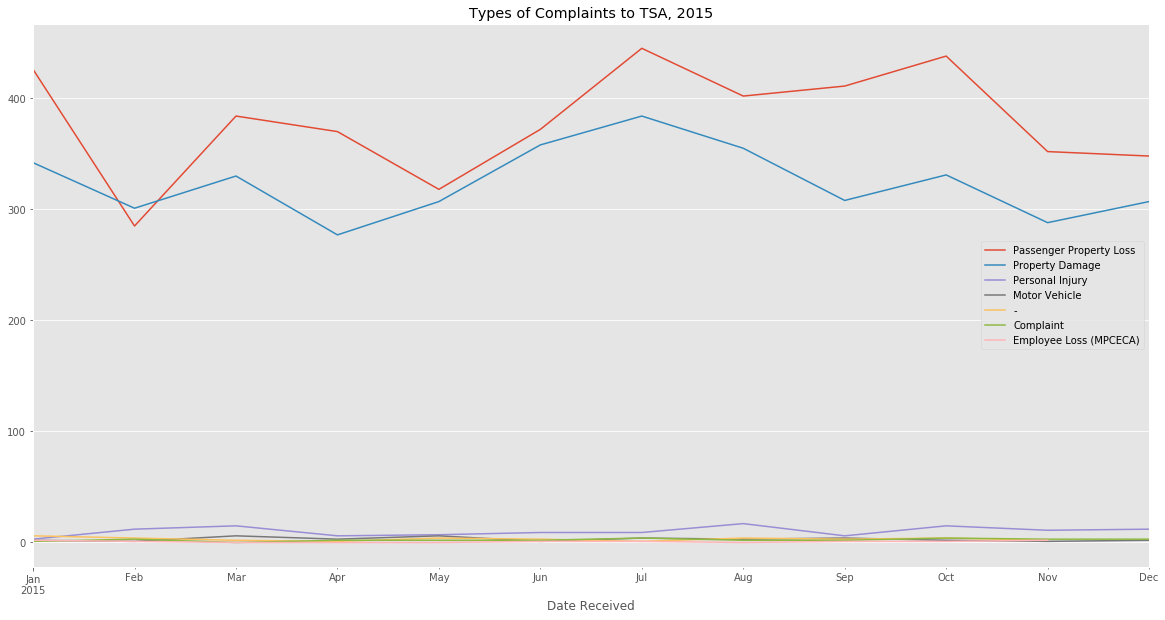

In [127]:
fig, ax = plt.subplots(figsize = (20,10))

ax.set_title('Types of Complaints to TSA, 2015')

df[df['Claim Type'] == 'Passenger Property Loss'].sort_index().resample('M').count().plot(label = 'Passenger Property Loss', y = 'Claim Type', ax=ax)
df[df['Claim Type'] == 'Property Damage'].sort_index().resample('M').count().plot(label = 'Property Damage', y = 'Claim Type', ax=ax)
df[df['Claim Type'] == 'Personal Injury'].sort_index().resample('M').count().plot(label = 'Personal Injury', y = 'Claim Type', ax=ax)
df[df['Claim Type'] == 'Motor Vehicle'].sort_index().resample('M').count().plot(label = 'Motor Vehicle', y = 'Claim Type', ax=ax)
df[df['Claim Type'] == '-'].sort_index().resample('M').count().plot(label = '-', y = 'Claim Type',ax=ax)
df[df['Claim Type'] == 'Complaint'].sort_index().resample('M').count().plot(label = 'Complaint', y = 'Claim Type', ax=ax)
df[df['Claim Type'] == 'Employee Loss (MPCECA)'].sort_index().resample('M').count().plot(label = 'Employee Loss (MPCECA)', y = 'Claim Type', ax=ax)


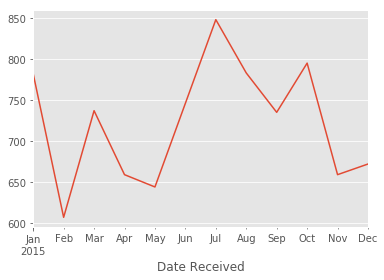

In [90]:
#how many claims are filed each month?
df['Claim Type'].resample('M').count().plot()

In [91]:
#it spikes in July. why? what claims are
#people making in July and June vs February?
summer = df[df.index.month.isin([6,7,8])]

#what do people complain about losing in the summer?
summer['Item Category'].value_counts().head(10)

Baggage/Cases/Purses      303
Computer & Accessories    196
Clothing                  188
Personal Electronics      156
Other                     132
Travel Accessories        131
Jewelry & Watches         121
Personal Accessories       97
Cosmetics & Grooming       85
-                          72
Name: Item Category, dtype: int64

In [92]:
winter = df[df.index.month.isin([1,2,3])]

#and in the winter?
winter['Item Category'].value_counts().head(10)

-                         347
Other                     237
Baggage/Cases/Purses      211
Clothing                  176
Computer & Accessories    166
Personal Electronics      124
Jewelry & Watches         119
Travel Accessories        109
Personal Accessories       66
Cosmetics & Grooming       63
Name: Item Category, dtype: int64

In [93]:
#look at JFK complaints
#since that's the airport people complain about most
jfk = df.loc[df['Airport Code'] == 'JFK']
jfk.head()

,Claim Number,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
Date Received,,,,,,,,,,
2015-01-02,2015010519561,2014-12-24,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checkpoint,Food & Drink,25,Approve in Full
2015-01-02,2015010519572,2014-11-21,JFK,John F. Kennedy International,Air France,Passenger Property Loss,Checked Baggage,Toys & Games; Travel Accessories,400,Approve in Full
2015-01-05,2015010519547,2014-12-11,JFK,John F. Kennedy International,Delta Air Lines,Property Damage,Checked Baggage,Audio/Video,250,Settle
2015-01-05,2015010519583,2014-10-04,JFK,John F. Kennedy International,Jet Blue,Property Damage,Checked Baggage,Other,-,-
2015-01-05,2015010519593,2014-12-10,JFK,John F. Kennedy International,Delta Air Lines,Property Damage,Checkpoint,Computer & Accessories,350.52,Settle


In [119]:
jfk['Claim Type'].value_counts()
#ouch. southwest airlines alone had nearly 3 times as many
#complaints of passengers property loss as 
#all of jfk airport

Passenger Property Loss    296
Property Damage            218
Personal Injury              4
Complaint                    2
-                            2
Motor Vehicle                1
Name: Claim Type, dtype: int64

**Southwest Airlines lost nearly three times the amount of luggage in 2015 as all of JFK airport.**